In [1]:
#############################################
# Advanced Functional Exploratory Data Analysis (EDA)
#############################################
# 1. Data Understanding
# 2. Analysis of Categorical Variables
# 3. Analysis of Target Variable
# 4. Analysis of Correlation
# 5. Visualization of Target and Independent Variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##########################
# 1. Data Understanding
##########################

# Read Excel file
df = pd.read_excel('/content/plm_approvals.xlsx')


def check_df(dataframe, head=5):
    print("############################ Info #############################")
    print(dataframe.info())
    print("\n############################ Shape ############################")
    print(dataframe.shape)
    print("\n############################ Types ############################")
    print(dataframe.dtypes)
    print("\n############################ Head #############################")
    print(dataframe.head(head))
    print("\n############################ Tail #############################")
    print(dataframe.tail(head))
    print("\n##################### Missing Values (NA) #####################")
    print(dataframe.isnull().sum())
    print("\n########################## Quantiles ##########################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("\n######################## Unique Values ########################")
    print(dataframe.nunique())

check_df(df)

############################ Info #############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Complexity     200 non-null    int64 
 1   Change_Type    200 non-null    object
 2   Department     200 non-null    object
 3   Requested_By   200 non-null    object
 4   Approval_Days  200 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ KB
None

############################ Shape ############################
(200, 5)

############################ Types ############################
Complexity        int64
Change_Type      object
Department       object
Requested_By     object
Approval_Days     int64
dtype: object

############################ Head #############################
   Complexity Change_Type   Department Requested_By  Approval_Days
0           7       Minor  Engineering        UserE             19
1   

In [2]:
#############################################
# 2. Analysis of Categorical Variables
#############################################

def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

In [3]:
cat_summary(df, "Change_Type")

             Change_Type  Ratio
Change_Type                    
Moderate              71   35.5
Minor                 67   33.5
Major                 62   31.0


In [4]:
cat_summary(df, "Department")

                    Department  Ratio
Department                           
Engineering                 80   40.0
R&D                         36   18.0
Production                  28   14.0
Quality                     25   12.5
Project_Management          15    7.5
Supply_Chain                 8    4.0
Maintenance                  8    4.0


In [5]:
cat_summary(df, "Requested_By")

              Requested_By  Ratio
Requested_By                     
UserA                   51   25.5
UserB                   36   18.0
UserE                   29   14.5
UserD                   28   14.0
UserC                   25   12.5
UserG                   15    7.5
UserF                    8    4.0
UserH                    8    4.0


In [6]:
cat_summary(df, "Complexity")

            Complexity  Ratio
Complexity                   
7                   29   14.5
1                   26   13.0
3                   25   12.5
4                   23   11.5
8                   23   11.5
9                   20   10.0
5                   19    9.5
6                   18    9.0
2                   17    8.5


In [7]:
#############################################
# 3. Analysis of Target Variable
#############################################

cat_summary(df, "Approval_Days")

               Approval_Days  Ratio
Approval_Days                      
8                         16    8.0
13                        16    8.0
6                         15    7.5
7                         13    6.5
5                         13    6.5
15                        11    5.5
11                        11    5.5
10                        11    5.5
17                        10    5.0
14                        10    5.0
18                        10    5.0
3                          9    4.5
4                          8    4.0
12                         8    4.0
9                          7    3.5
2                          7    3.5
19                         5    2.5
16                         5    2.5
21                         5    2.5
1                          3    1.5
20                         2    1.0
22                         2    1.0
23                         1    0.5
26                         1    0.5
28                         1    0.5


In [16]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

cat_cols= ["Complexity", "Change_Type", "Department", "Requested_By"]

for col in cat_cols:
    target_summary_with_cat(df, "Approval_Days", col)

            TARGET_MEAN
Complexity             
1              3.692308
2              4.823529
3              7.200000
4              9.608696
5             10.789474
6             12.611111
7             14.620690
8             16.304348
9             16.700000


             TARGET_MEAN
Change_Type             
Major          11.645161
Minor          10.402985
Moderate       10.211268


                    TARGET_MEAN
Department                     
Engineering            9.937500
Maintenance           10.250000
Production             9.678571
Project_Management    13.066667
Quality               11.400000
R&D                   11.083333
Supply_Chain          14.500000


              TARGET_MEAN
Requested_By             
UserA            9.764706
UserB           11.083333
UserC           11.400000
UserD            9.678571
UserE           10.241379
UserF           14.500000
UserG           13.066667
UserH           10.250000




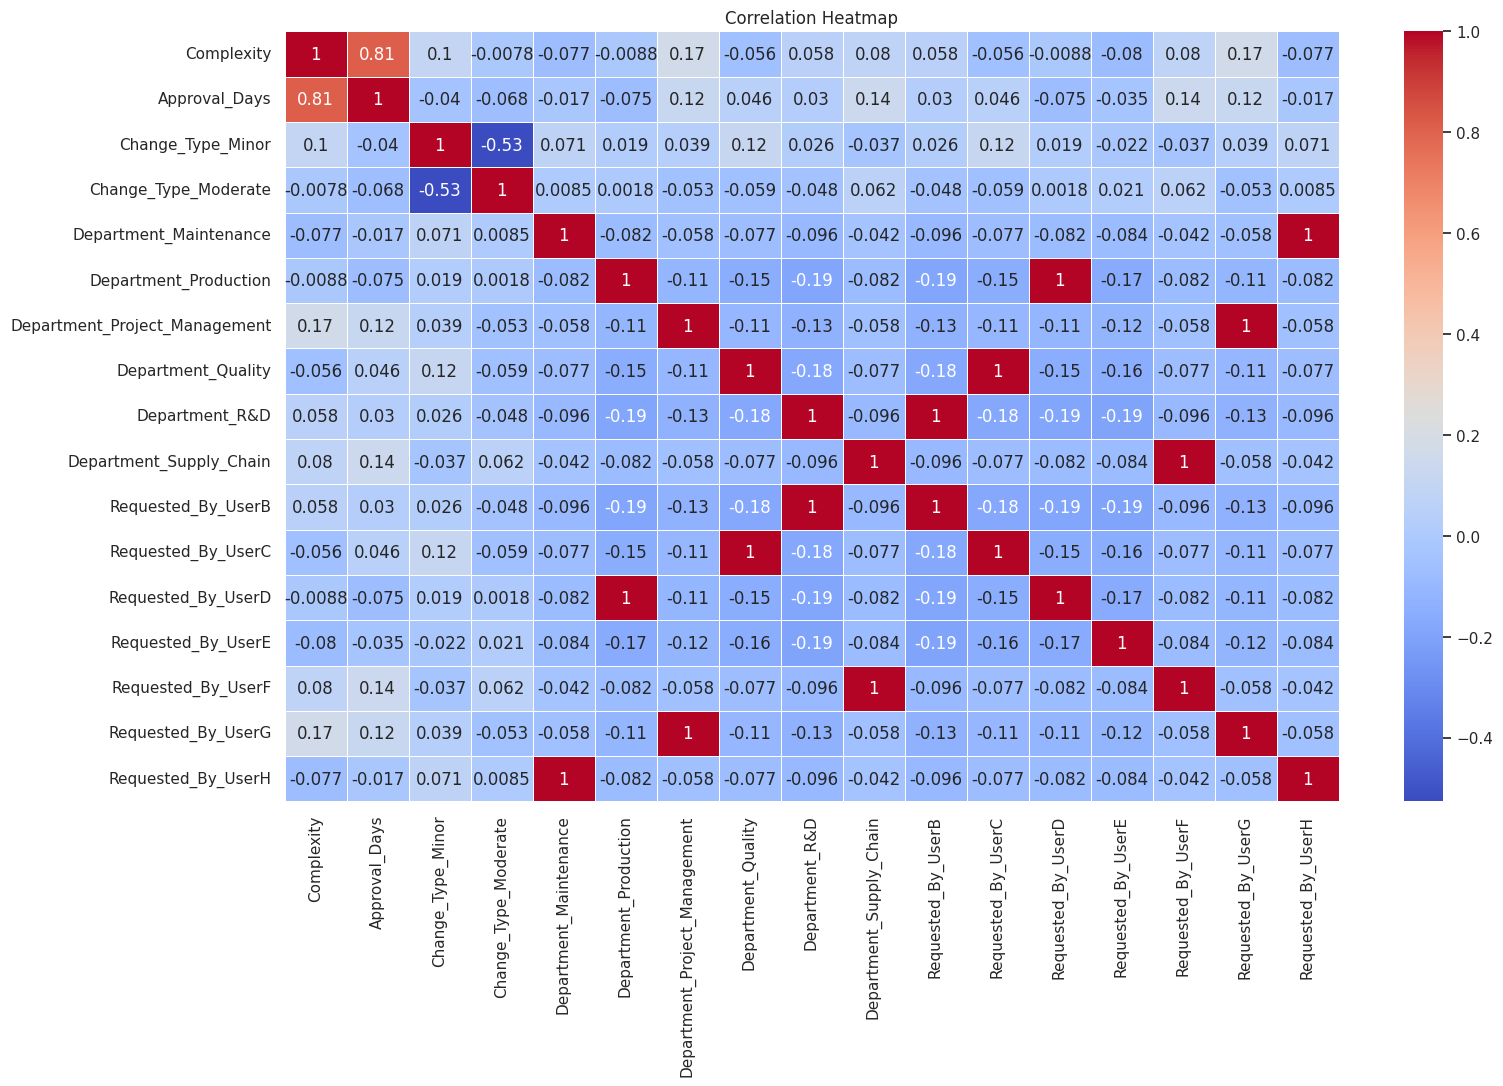

In [ ]:
#############################################
# 4. Analysis of Correlation
#############################################

# Converting categorical variables to numeric values using one-hot encoding
df_one_hot = pd.get_dummies(df, drop_first=True)

# Heatmap to show correlation between numerical variables
plt.figure(figsize=(17, 10))
sns.heatmap(df_one_hot.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

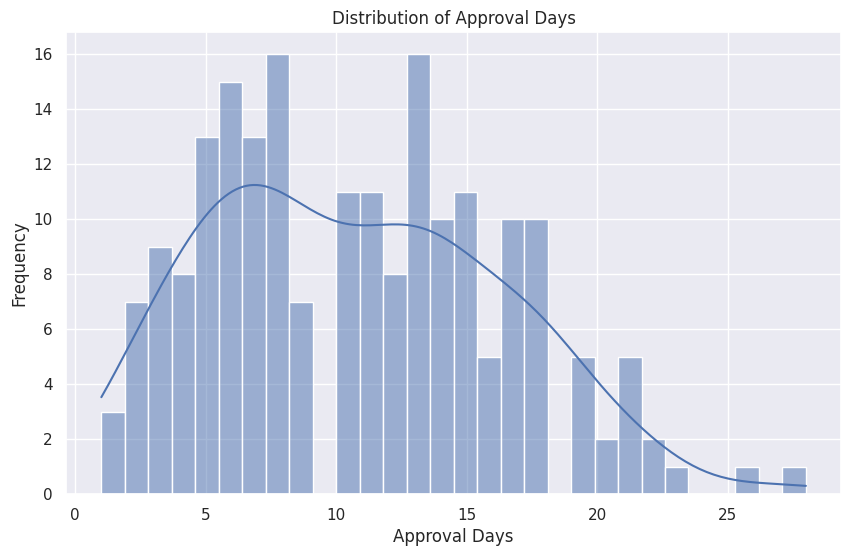

In [ ]:
#############################################
# 5. Visualization of Target and Independent Variables
#############################################

# Distribution of Approval_Days
plt.figure(figsize=(10, 6))
sns.histplot(df['Approval_Days'], bins=30, kde=True)
plt.title('Distribution of Approval Days')
plt.xlabel('Approval Days')
plt.ylabel('Frequency')
plt.show()

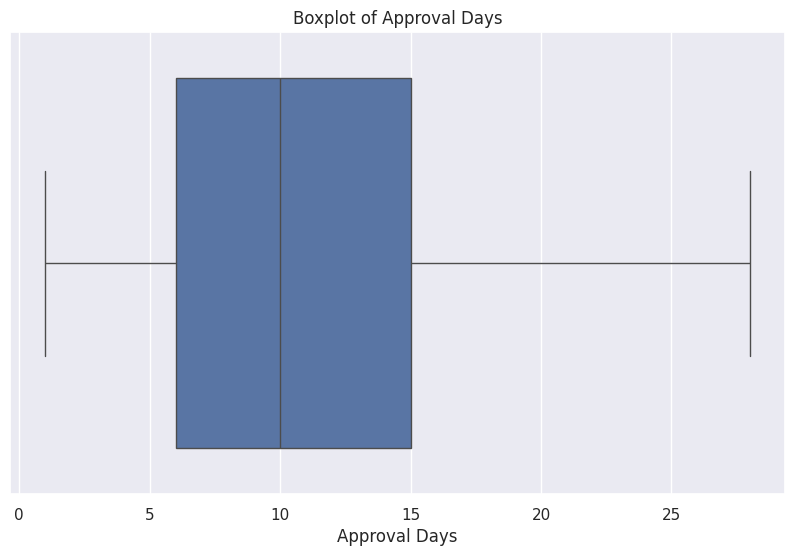

In [ ]:
# Boxplot to check for outliers in Approval_Days
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Approval_Days'])
plt.title('Boxplot of Approval Days')
plt.xlabel('Approval Days')
plt.show()

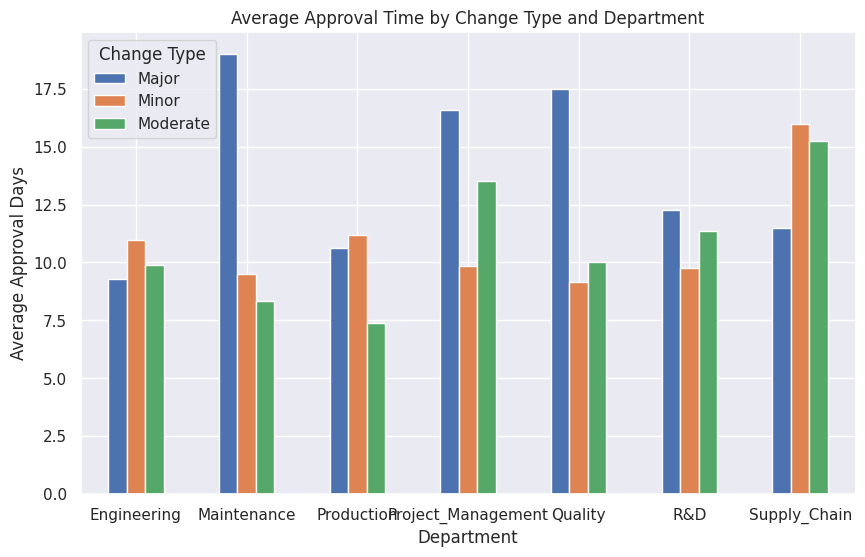

In [ ]:
# Average Approval Time by Change Type and Department
avg_approval = df.groupby(['Department', 'Change_Type'])['Approval_Days'].mean().unstack()
avg_approval.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Average Approval Days')
plt.title('Average Approval Time by Change Type and Department')
plt.xticks(rotation=0)
_ = plt.legend(title='Change Type')

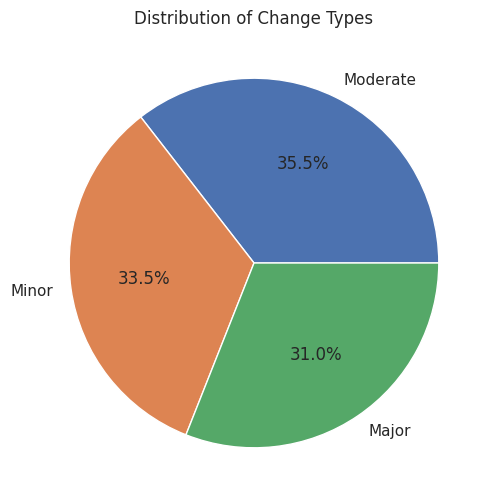

In [ ]:
# Distribution of Change Types
plt.figure(figsize=(6, 6))
df['Change_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
_ = plt.title('Distribution of Change Types')

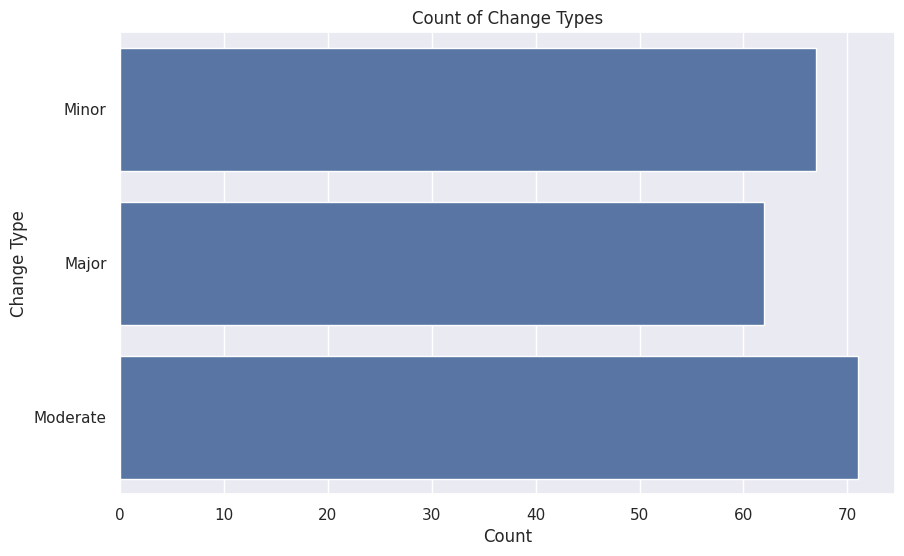

In [ ]:
# Count plot for Change Type
plt.figure(figsize=(10, 6))
sns.countplot(y='Change_Type', data=df)
plt.title('Count of Change Types')
plt.xlabel('Count')
plt.ylabel('Change Type')
plt.show()

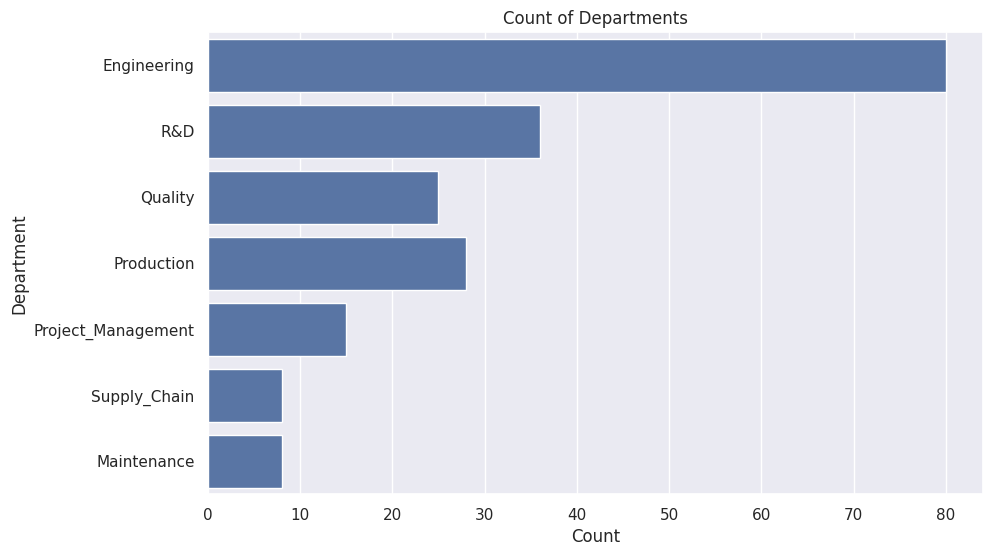

In [ ]:
# Count plot for Departments
plt.figure(figsize=(10, 6))
sns.countplot(y='Department', data=df)
plt.title('Count of Departments')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

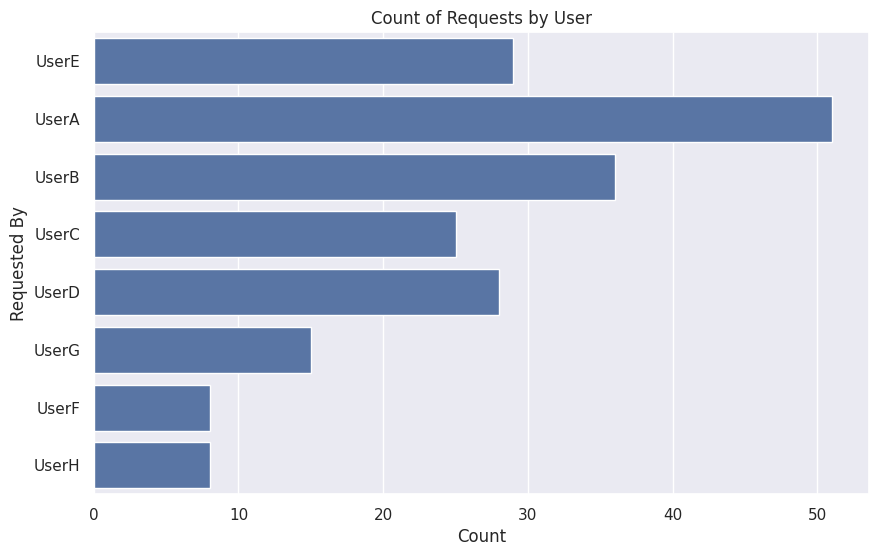

In [ ]:
# Count plot for Requests By User
plt.figure(figsize=(10, 6))
sns.countplot(y='Requested_By', data=df)
plt.title('Count of Requests by User')
plt.xlabel('Count')
plt.ylabel('Requested By')
plt.show()

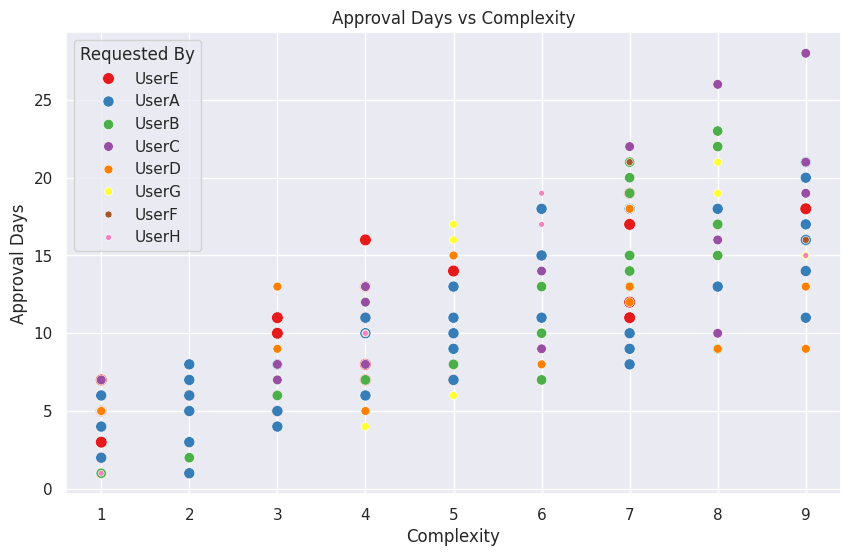

In [ ]:
# Scatter plot to visualize the relationship between Approval_Days and Complexity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Complexity', y='Approval_Days', hue='Requested_By',  size="Requested_By", data=df, palette='Set1')
plt.title('Approval Days vs Complexity')
plt.xlabel('Complexity')
plt.ylabel('Approval Days')
plt.legend(title='Requested By')
plt.show()

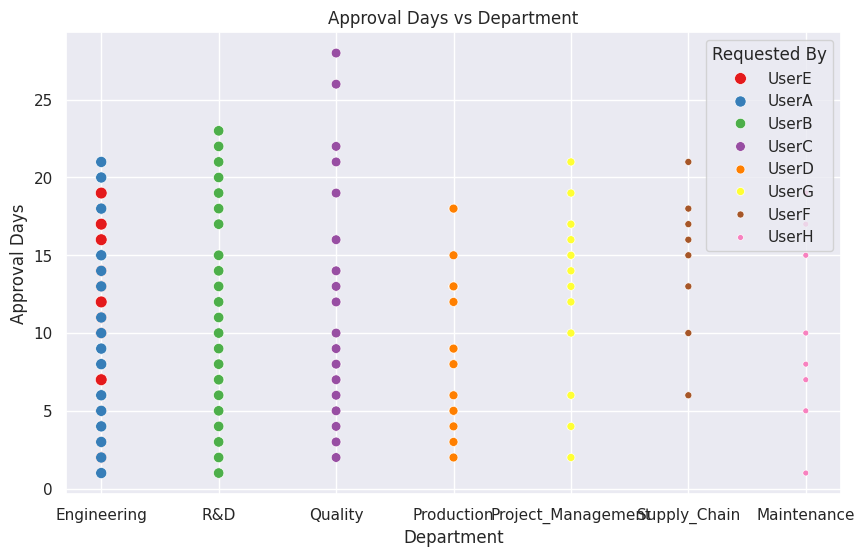

In [ ]:
# Scatter plot to visualize the relationship between Approval_Days and Department
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Department', y='Approval_Days', hue='Requested_By',  size="Requested_By", data=df, palette="Set1")
plt.title('Approval Days vs Department')
plt.xlabel('Department')
plt.ylabel('Approval Days')
plt.legend(title='Requested By')
plt.show()

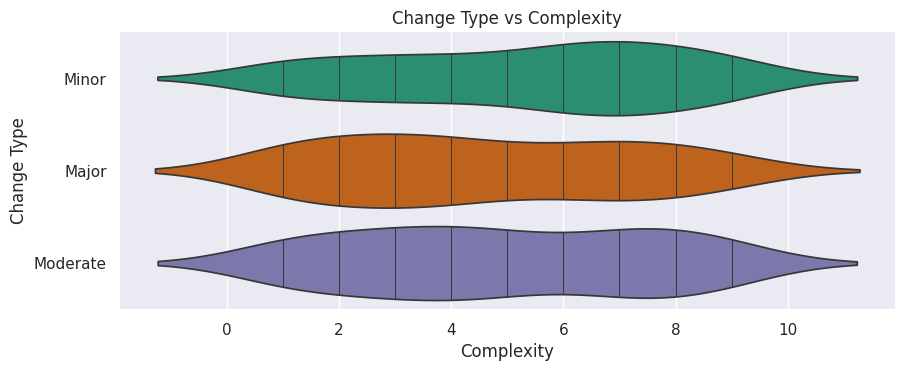

In [ ]:
# Change_Type vs Complexity
figsize = (10, 1.2 * len(df['Change_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='Complexity', y='Change_Type', hue='Change_Type', inner='stick', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Change Type vs Complexity')
plt.xlabel('Complexity')
plt.ylabel('Change Type')
#plt.legend(title='Change Type')
plt.show()

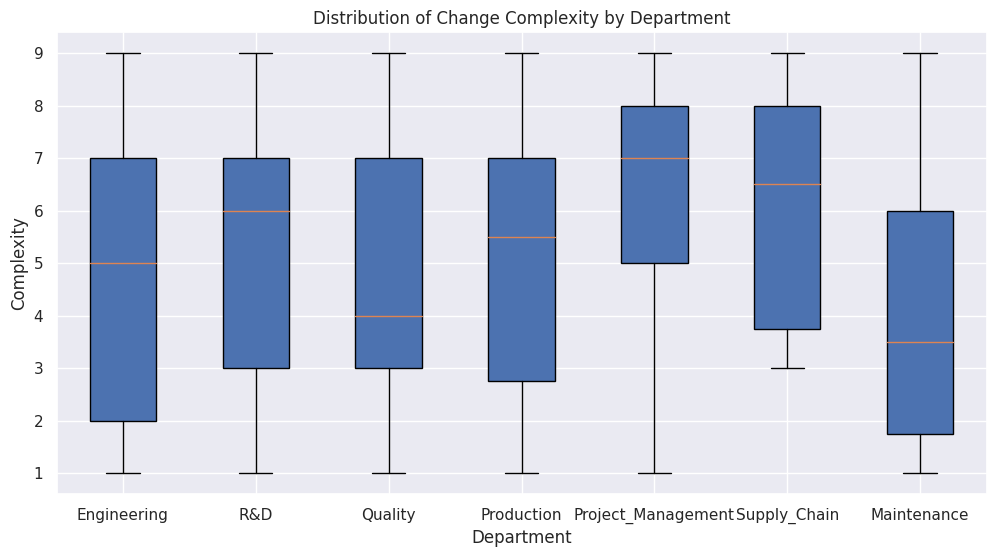

In [ ]:
# Distribution of Change Complexity by Department
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Department'] == dept]['Complexity'] for dept in df['Department'].unique()],
            labels=df['Department'].unique(), patch_artist=True)
plt.xlabel('Department')
plt.ylabel('Complexity')
_ = plt.title('Distribution of Change Complexity by Department')

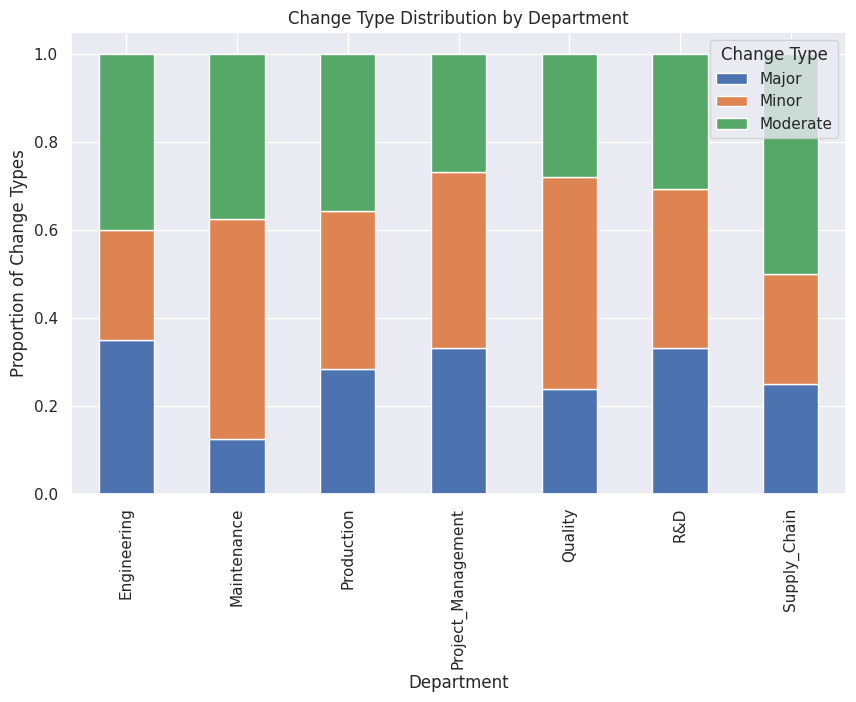

In [ ]:
# Change Type Distribution by Department
df.groupby('Department')['Change_Type'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Proportion of Change Types')
plt.title('Change Type Distribution by Department')
_ = plt.legend(title='Change Type')

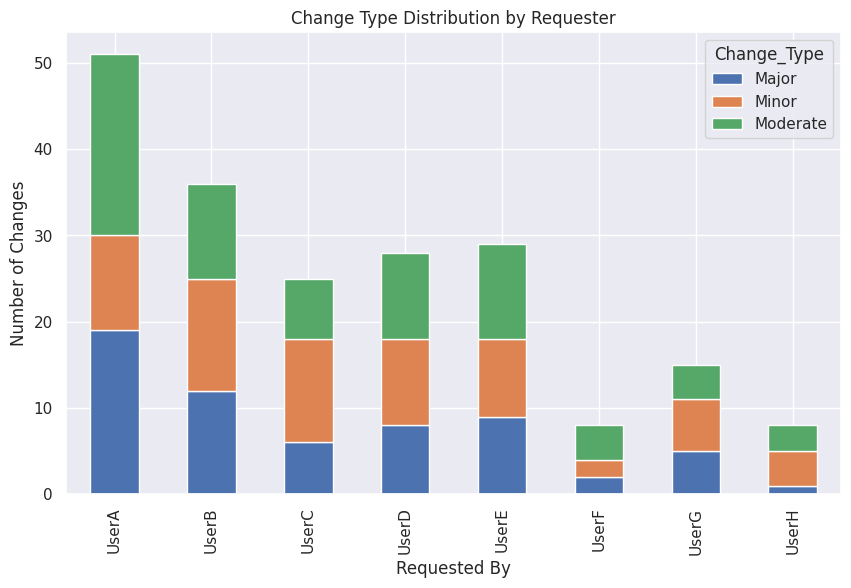

In [ ]:
# Change Type Distribution by Requester
change_type_counts = df.groupby(['Requested_By', 'Change_Type'])['Change_Type'].count().unstack()
change_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Requested By')
plt.ylabel('Number of Changes')
_ = plt.title('Change Type Distribution by Requester')

In [ ]:
##########################
# Bonus
##########################

# Filtering data where Approval Days > 18 and Complexity > 7
filtered_df = df[(df['Approval_Days'] > 18) & (df['Complexity'] > 7)]

# Display the filtered data and sort for Approval_days
ascending_df = filtered_df.sort_values(by='Approval_Days', ascending=False)
print(ascending_df)

     Complexity Change_Type          Department Requested_By  Approval_Days
107           9       Major             Quality        UserC             28
10            8       Major             Quality        UserC             26
44            8       Minor                 R&D        UserB             23
148           8    Moderate                 R&D        UserB             22
61            9    Moderate         Engineering        UserA             21
76            8       Major  Project_Management        UserG             21
87            9       Minor             Quality        UserC             21
138           9       Major         Engineering        UserA             20
59            8    Moderate  Project_Management        UserG             19
180           9       Minor             Quality        UserC             19
